In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import tensorflow_hub as hub

In [2]:
# Select an Image Classification model

model_name = "mobilenetv2-035-128"

model_handle_map = {
   "mobilenetv2-035-128": "https://tfhub.dev/google/imagenet/mobilenet_v2_035_128/classification/2",
}

model_image_size_map = {
  "mobilenetv2-035-128": 128,
}

model_handle = model_handle_map[model_name]

transfer learning with **mobilenetv2-035-128**

In [3]:
ai_image1_path_1='/content/drive/MyDrive/archive (4)/Dataset of AI Generated Fruits and Real Fruits/Ai/Green Apples/Overhead Shots'
ai_image1_path_2='/content/drive/MyDrive/archive (4)/Dataset of AI Generated Fruits and Real Fruits/Ai/Green Apples/Side Shots'
ai_image2_path_1='/content/drive/MyDrive/archive (4)/Dataset of AI Generated Fruits and Real Fruits/Ai/Red Apples/Overhead Shots'
ai_image2_path_2='/content/drive/MyDrive/archive (4)/Dataset of AI Generated Fruits and Real Fruits/Ai/Red Apples/Side Shots'
images=[]
class_name=['red apples','green apples']
labels=[]

for i in os.listdir(ai_image1_path_1):
  filepath=os.path.join(ai_image1_path_1,i)
  print(filepath)
  label=np.zeros(2)
  label[1]=1
  images_capture=cv2.imread(filepath)
  resized_img = cv2.resize(images_capture, (128,128))
  images.append(resized_img)
  labels.append(label)
for i in os.listdir(ai_image2_path_2):
  filepath=os.path.join(ai_image2_path_2,i)
  print(filepath)
  label=np.zeros(2)
  label[0]=1
  images_capture=cv2.imread(filepath)
  resized_img = cv2.resize(images_capture, (128,128))
  images.append(resized_img)
  labels.append(label)
print(" ")


/content/drive/MyDrive/archive (4)/Dataset of AI Generated Fruits and Real Fruits/Ai/Green Apples/Overhead Shots/green-apple-ohs-12.jpg
/content/drive/MyDrive/archive (4)/Dataset of AI Generated Fruits and Real Fruits/Ai/Green Apples/Overhead Shots/green-apple-ohs-1.jpg
/content/drive/MyDrive/archive (4)/Dataset of AI Generated Fruits and Real Fruits/Ai/Green Apples/Overhead Shots/green-apple-ohs-10.jpg
/content/drive/MyDrive/archive (4)/Dataset of AI Generated Fruits and Real Fruits/Ai/Green Apples/Overhead Shots/green-apple-ohs-17.jpg
/content/drive/MyDrive/archive (4)/Dataset of AI Generated Fruits and Real Fruits/Ai/Green Apples/Overhead Shots/green-apple-ohs-16.jpg
/content/drive/MyDrive/archive (4)/Dataset of AI Generated Fruits and Real Fruits/Ai/Green Apples/Overhead Shots/green-apple-ohs-11.jpg
/content/drive/MyDrive/archive (4)/Dataset of AI Generated Fruits and Real Fruits/Ai/Green Apples/Overhead Shots/green-apple-ohs-14.jpg
/content/drive/MyDrive/archive (4)/Dataset of AI 

In [4]:
images

[array([[[226, 226, 226],
         [225, 225, 225],
         [222, 224, 224],
         ...,
         [227, 227, 227],
         [230, 230, 230],
         [230, 230, 230]],
 
        [[217, 219, 219],
         [220, 222, 222],
         [223, 225, 226],
         ...,
         [210, 212, 212],
         [214, 216, 216],
         [220, 221, 219]],
 
        [[207, 211, 212],
         [203, 207, 211],
         [204, 214, 217],
         ...,
         [230, 230, 230],
         [229, 229, 229],
         [230, 230, 230]],
 
        ...,
 
        [[213, 218, 217],
         [210, 212, 212],
         [213, 215, 215],
         ...,
         [224, 222, 221],
         [227, 223, 222],
         [225, 223, 222]],
 
        [[216, 221, 220],
         [214, 216, 216],
         [214, 216, 216],
         ...,
         [226, 224, 223],
         [229, 225, 224],
         [226, 224, 223]],
 
        [[207, 212, 211],
         [217, 219, 219],
         [215, 217, 217],
         ...,
         [228, 224, 223],
  

In [5]:
labels

[array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1.

In [6]:
g=0
for i in os.listdir(ai_image2_path_1):
  filepath=os.path.join(ai_image2_path_1,i)
  print(filepath)
  label=np.zeros(2)
  label[0]=1
  images_capture=cv2.imread(filepath)
  resized_img = cv2.resize(images_capture, (128,128))
  images.append(resized_img)
  labels.append(label)
print(g)
for i in os.listdir(ai_image1_path_2):
  filepath=os.path.join(ai_image1_path_2,i)
  print(filepath)
  label=np.zeros(2)
  label[1]=1
  images_capture=cv2.imread(filepath)
  resized_img = cv2.resize(images_capture, (128,128))
  images.append(resized_img)
  labels.append(label)

/content/drive/MyDrive/archive (4)/Dataset of AI Generated Fruits and Real Fruits/Ai/Red Apples/Overhead Shots/red-apple-ohs-12.jpg
/content/drive/MyDrive/archive (4)/Dataset of AI Generated Fruits and Real Fruits/Ai/Red Apples/Overhead Shots/red-apple-ohs-13.jpg
/content/drive/MyDrive/archive (4)/Dataset of AI Generated Fruits and Real Fruits/Ai/Red Apples/Overhead Shots/red-apple-ohs-20.jpg
/content/drive/MyDrive/archive (4)/Dataset of AI Generated Fruits and Real Fruits/Ai/Red Apples/Overhead Shots/red-apple-ohs-17.jpg
/content/drive/MyDrive/archive (4)/Dataset of AI Generated Fruits and Real Fruits/Ai/Red Apples/Overhead Shots/red-apple-ohs-14.jpg
/content/drive/MyDrive/archive (4)/Dataset of AI Generated Fruits and Real Fruits/Ai/Red Apples/Overhead Shots/red-apple-ohs-19.jpg
/content/drive/MyDrive/archive (4)/Dataset of AI Generated Fruits and Real Fruits/Ai/Red Apples/Overhead Shots/red-apple-ohs-10.jpg
/content/drive/MyDrive/archive (4)/Dataset of AI Generated Fruits and Real F

In [7]:
images[100].shape

(128, 128, 3)

In [8]:
g=0
for i in range(150):
  if images[i].shape!=(128,128,3):
    print(i)
    g+=1
print(g)

0


In [9]:
images[149].shape

(128, 128, 3)

In [10]:
labels

[array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1., 0.]),
 array([1.

In [11]:
len(images)

150

In [12]:
len(labels)

150

In [13]:
images_array = np.stack(images)
images_array.shape

(150, 128, 128, 3)

In [14]:
labels=np.asarray(labels)


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_valid,Y_train,Y_valid=train_test_split(images_array,labels,test_size=0.1,random_state=42)

In [16]:
X_train.shape,Y_train.shape

((135, 128, 128, 3), (135, 2))

In [17]:
# data augmentation for training images
import tensorflow as tf
train_image_generator=tf.keras.preprocessing.image.ImageDataGenerator(shear_range=1.8,
                                                                         rotation_range=40,
                                                                         zoom_range=1.4,
                                                                         vertical_flip=True,
                                                                         horizontal_flip=True)
train_image_generator=train_image_generator.flow(X_train,Y_train)

In [18]:
# data augmentation for validation images
valid_image_generator=tf.keras.preprocessing.image.ImageDataGenerator(shear_range=1.4,
                                                                         rotation_range=35,
                                                                         zoom_range=1.5,
                                                                         vertical_flip=True,
                                                                         horizontal_flip=True)
valid_image_generator=valid_image_generator.flow(X_valid,Y_valid)

altering the ImageDataGenerator values to avoid overfitting in the model


In [19]:
model=tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(128,128,3)),
        hub.KerasLayer(model_handle,trainable=False),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(2,kernel_regularizer=tf.keras.regularizers.l2(0.1))
])


alerting with regularizer to avoid overfitting

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1692489   
                                                                 
 dropout (Dropout)           (None, 1001)              0         
                                                                 
 dense (Dense)               (None, 2)                 2004      
                                                                 
Total params: 1694493 (6.46 MB)
Trainable params: 2004 (7.83 KB)
Non-trainable params: 1692489 (6.46 MB)
_________________________________________________________________


In [21]:
model.compile(
    optimizer="Adam",
        loss="binary_crossentropy",
    metrics=['accuracy']

)

In [37]:
history=model.fit(train_image_generator,verbose=1,epochs=45,validation_data=valid_image_generator)

Epoch 1/45
5/5 [==============================] - 1s 190ms/step - loss: 7.8720 - accuracy: 0.8593 - val_loss: 8.0932 - val_accuracy: 0.9333
Epoch 2/45
5/5 [==============================] - 1s 118ms/step - loss: 7.8795 - accuracy: 0.8667 - val_loss: 8.0930 - val_accuracy: 0.8667
Epoch 3/45
5/5 [==============================] - 1s 121ms/step - loss: 7.8416 - accuracy: 0.8741 - val_loss: 8.0941 - val_accuracy: 0.8667
Epoch 4/45
5/5 [==============================] - 1s 127ms/step - loss: 7.6821 - accuracy: 0.8519 - val_loss: 8.0956 - val_accuracy: 0.9333
Epoch 5/45
5/5 [==============================] - 1s 121ms/step - loss: 7.2015 - accuracy: 0.8667 - val_loss: 7.6145 - val_accuracy: 0.8000
Epoch 6/45
5/5 [==============================] - 1s 129ms/step - loss: 5.9156 - accuracy: 0.8667 - val_loss: 7.0712 - val_accuracy: 0.7333
Epoch 7/45
5/5 [==============================] - 1s 153ms/step - loss: 6.3417 - accuracy: 0.8815 - val_loss: 4.1628 - val_accuracy: 0.8000
Epoch 8/45
5/5 [====

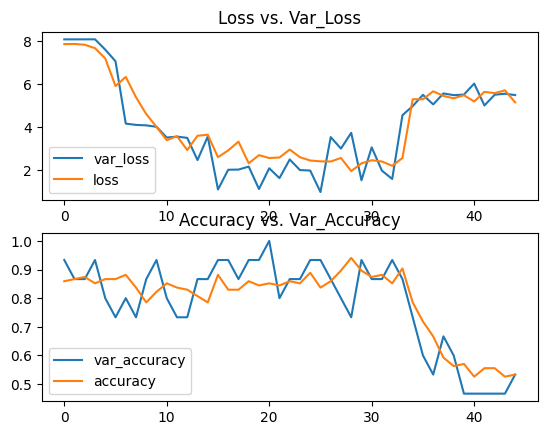

In [38]:
fig, axs = plt.subplots(2)
t=history.history['val_loss']
t1=history.history['loss']

# Plot var_loss and loss on the first subplot
axs[0].plot(t, label='var_loss')
axs[0].plot(t1, label='loss')
axs[0].set_title('Loss vs. Var_Loss')
axs[0].legend()

# Plot var_accuracy and accuracy on the second subplot
axs[1].plot(history.history['val_accuracy'], label='var_accuracy')
axs[1].plot(history.history['accuracy'], label='accuracy')
axs[1].set_title('Accuracy vs. Var_Accuracy')
axs[1].legend()

# Display the figure
plt.show()

graph depicts model is still 

overfitted

In [39]:
def preprocess(img):
  img=cv2.imread(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img=cv2.resize(img,(128,128))

  plt.imshow(img)
  img=np.expand_dims(img,axis=0)
  print(img.shape)

  return img










In [25]:
def result(img):
   k=model.predict(img)
   print(k)
   if np.argmax(k)==1:
     print("Green apple")
   else:
     print("red apple")

(1, 128, 128, 3)
1/1 [==============================] - 0s 31ms/step
[[3.3412354 9.614537 ]]
Green apple


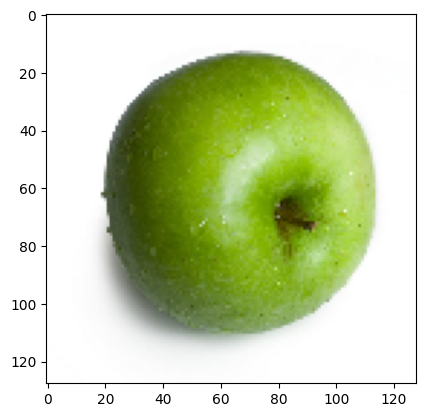

In [40]:
img=preprocess("/content/sample1.jpg")
result(img)

(1, 128, 128, 3)
1/1 [==============================] - 0s 21ms/step
[[5.771077 4.968638]]
red apple


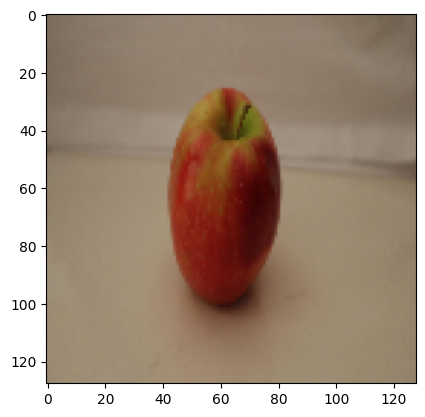

In [41]:
img=preprocess("/content/sample2.jpg")
result(img)

(1, 128, 128, 3)
1/1 [==============================] - 0s 21ms/step
[[3.6656206 7.200005 ]]
Green apple


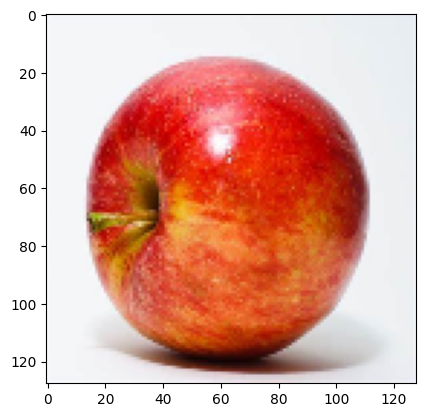

In [42]:
img=preprocess("/content/sample3.jpg")
result(img)

(1, 128, 128, 3)
1/1 [==============================] - 0s 20ms/step
[[5.7637596 6.2722983]]
Green apple


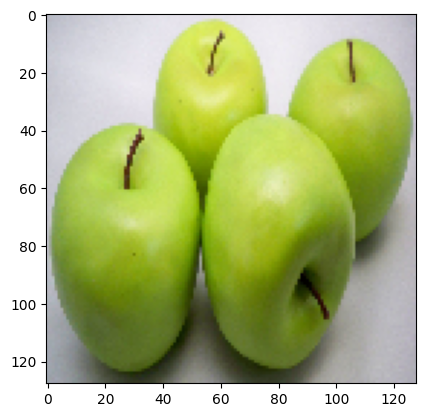

In [43]:
img=preprocess("/content/sample4.jpg")
result(img)

3/4 images is predicted correctly